In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**To Load Dataset**

In [39]:
try:
    data = pd.read_csv("real_estate_nrb_cleaned.csv", sep=';', on_bad_lines='warn')
    # If you want to see which lines are causing errors, you can switch to 'warn'.
    # data = pd.read_csv("real_estate_nrb_cleaned.csv", sep=';', on_bad_lines='warn')
    print(data.head())
except Exception as e:
    print("An error occurred:", e)

                                          Title   Category  \
0  5 Bed Townhouse With En Suite At Kiambu Road  Townhouse   
1           3 Bed Villa With En Suite At Mtwapa      Villa   
2    4 Bed House With En Suite In Ongata Rongai      Other   
3      6 Bed House With En Suite At Kiambu Road      Other   
4          3 Bed House With En Suite At Vipingo   Bungalow   

                             Location  Beds  Baths     Price  
0  Muthithi, Kiambu Road, Kiambu Town     5      6  30000000  
1            La-Marina Estate, Mtwapa     3      4  38500000  
2                       Ongata Rongai     4      5  14000000  
3            Kiambu Road, Kiambu Road     6      6  85000000  
4                             Vipingo     3      4  15500000  


In [40]:
data

,Title,Category,Location,Beds,Baths,Price
0,5 Bed Townhouse With En Suite At Kiambu Road,Townhouse,"Muthithi, Kiambu Road, Kiambu Town",5,6,30000000
1,3 Bed Villa With En Suite At Mtwapa,Villa,"La-Marina Estate, Mtwapa",3,4,38500000
2,4 Bed House With En Suite In Ongata Rongai,Other,Ongata Rongai,4,5,14000000
3,6 Bed House With En Suite At Kiambu Road,Other,"Kiambu Road, Kiambu Road",6,6,85000000
4,3 Bed House With En Suite At Vipingo,Bungalow,Vipingo,3,4,15500000
...,...,...,...,...,...,...
4245,7 Bed House With En Suite In Runda,Other,"Runda, Westlands",7,6,260000000
4246,3 Bed House With En Suite In Kitengela,Bungalow,Kitengela,3,4,6500000
4247,3 Bed House With En Suite In Ruiru,Bungalow,Ruiru,3,3,7300000
4248,3 Bed House With En Suite In Ngong,Bungalow,Ngong,3,4,7500000


# Explore the data to check for null values

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     4250 non-null   object
 1   Category  4250 non-null   object
 2   Location  4105 non-null   object
 3   Beds      4250 non-null   int64 
 4   Baths     4250 non-null   int64 
 5   Price     4250 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 199.3+ KB


In [42]:
data.dropna(inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4105 entries, 0 to 4249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     4105 non-null   object
 1   Category  4105 non-null   object
 2   Location  4105 non-null   object
 3   Beds      4105 non-null   int64 
 4   Baths     4105 non-null   int64 
 5   Price     4105 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 224.5+ KB


In [44]:
data

,Title,Category,Location,Beds,Baths,Price
0,5 Bed Townhouse With En Suite At Kiambu Road,Townhouse,"Muthithi, Kiambu Road, Kiambu Town",5,6,30000000
1,3 Bed Villa With En Suite At Mtwapa,Villa,"La-Marina Estate, Mtwapa",3,4,38500000
2,4 Bed House With En Suite In Ongata Rongai,Other,Ongata Rongai,4,5,14000000
3,6 Bed House With En Suite At Kiambu Road,Other,"Kiambu Road, Kiambu Road",6,6,85000000
4,3 Bed House With En Suite At Vipingo,Bungalow,Vipingo,3,4,15500000
...,...,...,...,...,...,...
4245,7 Bed House With En Suite In Runda,Other,"Runda, Westlands",7,6,260000000
4246,3 Bed House With En Suite In Kitengela,Bungalow,Kitengela,3,4,6500000
4247,3 Bed House With En Suite In Ruiru,Bungalow,Ruiru,3,3,7300000
4248,3 Bed House With En Suite In Ngong,Bungalow,Ngong,3,4,7500000


In [45]:
 """Save the data to a csv file"""
data.to_csv('processed_data.csv', index=False, sep=';')

# Feature preprocessing and Engineering

**Get the Log of the house features to provide a gaussian curve of the distribution**

In [46]:
data['Beds'] = np.log(data['Beds'] +1)
data['Baths'] = np.log(data['Baths'] +1)
# data['Price'] = np.log(data['Price'] +1)

**Plot histogram to explore the distribution of the different numerical features of the houses**

array([[<Axes: title={'center': 'Beds'}>,
        <Axes: title={'center': 'Baths'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

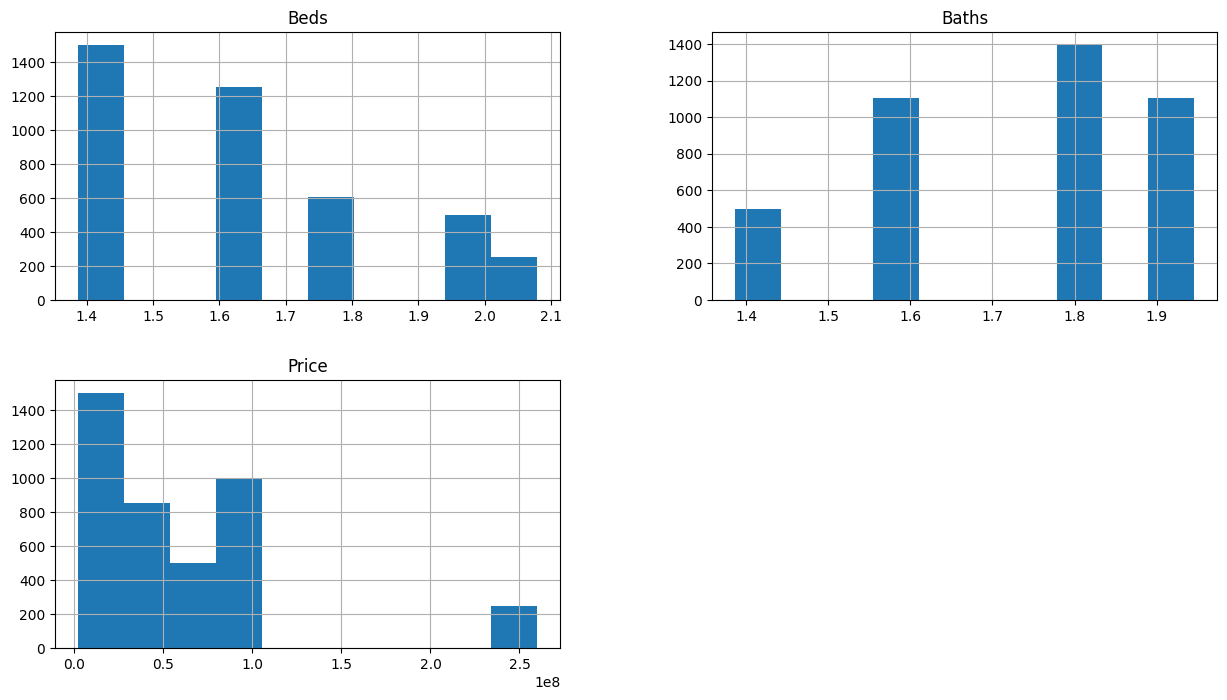

In [47]:
data.hist(figsize=(15, 8))

**Plot a heatmap to visualize the correlation matrix with the target variable - price**

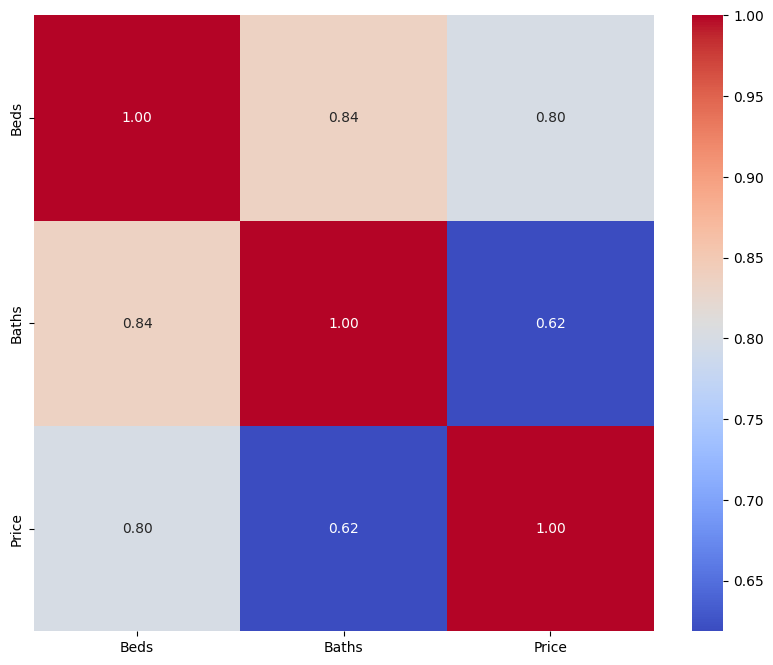

In [48]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Assign binary values to non-numeric data**

In [49]:
data.Category.value_counts()

Category
Other        1645
Bungalow     1000
Villa         855
Townhouse     605
Name: count, dtype: int64

**OneHotEncode the different categories to assign them numerical values**

In [50]:
pd.get_dummies(data.Category).astype(int)

,Bungalow,Other,Townhouse,Villa
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
4245,0,1,0,0
4246,1,0,0,0
4247,1,0,0,0
4248,1,0,0,0


In [51]:
data = data.join(pd.get_dummies(data.Category).astype(int)).drop(['Category'], axis=1)

In [52]:
data

,Title,Location,Beds,Baths,Price,Bungalow,Other,Townhouse,Villa
0,5 Bed Townhouse With En Suite At Kiambu Road,"Muthithi, Kiambu Road, Kiambu Town",1.791759,1.945910,30000000,0,0,1,0
1,3 Bed Villa With En Suite At Mtwapa,"La-Marina Estate, Mtwapa",1.386294,1.609438,38500000,0,0,0,1
2,4 Bed House With En Suite In Ongata Rongai,Ongata Rongai,1.609438,1.791759,14000000,0,1,0,0
3,6 Bed House With En Suite At Kiambu Road,"Kiambu Road, Kiambu Road",1.945910,1.945910,85000000,0,1,0,0
4,3 Bed House With En Suite At Vipingo,Vipingo,1.386294,1.609438,15500000,1,0,0,0
...,...,...,...,...,...,...,...,...,...
4245,7 Bed House With En Suite In Runda,"Runda, Westlands",2.079442,1.945910,260000000,0,1,0,0
4246,3 Bed House With En Suite In Kitengela,Kitengela,1.386294,1.609438,6500000,1,0,0,0
4247,3 Bed House With En Suite In Ruiru,Ruiru,1.386294,1.386294,7300000,1,0,0,0
4248,3 Bed House With En Suite In Ngong,Ngong,1.386294,1.609438,7500000,1,0,0,0


**Plot a correlation heatmap to show the correlation matrix with the categories**

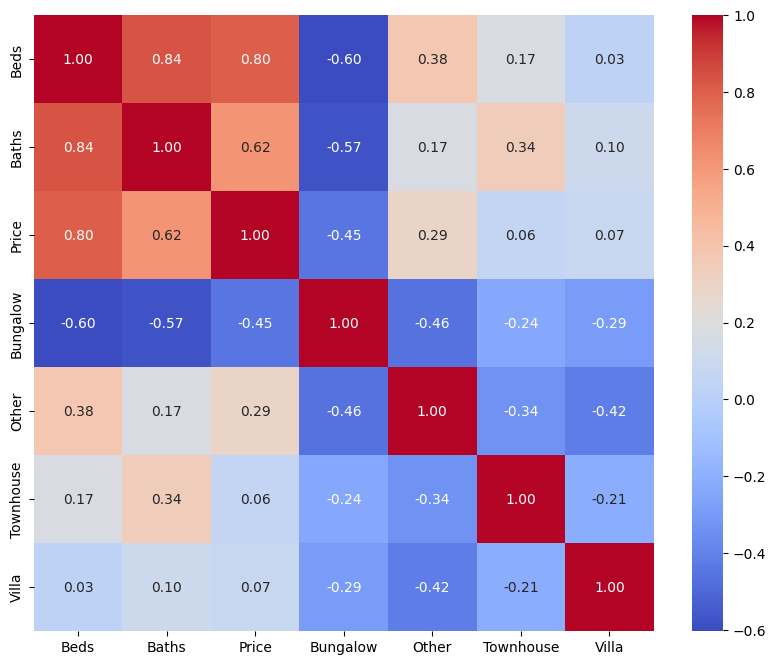

In [53]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Convert the Locations into binary representation**

In [54]:
data.Location.value_counts()

Location
Runda, Westlands                      750
Ongata Rongai                         250
Kiambu Road, Kiambu Road              250
Vipingo                               250
Lavington                             250
Karen                                 250
Two Rivers, Gigiri, Westlands         250
RUNDA, Runda, Westlands               250
Kazadani, Bamburi                     250
Mushroom Estate, Kiambu Road          250
Kitengela                             250
Ruiru                                 250
Ngong                                 250
Kiambu Road                           145
Muthithi, Kiambu Road, Kiambu Town    105
La-Marina Estate, Mtwapa              105
Name: count, dtype: int64

In [55]:
pd.get_dummies(data.Location).astype(int)

,Karen,"Kazadani, Bamburi",Kiambu Road,"Kiambu Road, Kiambu Road",Kitengela,"La-Marina Estate, Mtwapa",Lavington,"Mushroom Estate, Kiambu Road","Muthithi, Kiambu Road, Kiambu Town",Ngong,Ongata Rongai,"RUNDA, Runda, Westlands",Ruiru,"Runda, Westlands","Two Rivers, Gigiri, Westlands",Vipingo
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4246,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4247,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4248,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
processed_data = data.join(pd.get_dummies(data.Location).astype(int)).drop(['Location'], axis=1)

* drop the 'Title' column as it is non-numeric

In [57]:
processed_data = processed_data.drop(['Title'], axis=1)
processed_data

,Beds,Baths,Price,Bungalow,Other,Townhouse,Villa,Karen,"Kazadani, Bamburi",Kiambu Road,...,Lavington,"Mushroom Estate, Kiambu Road","Muthithi, Kiambu Road, Kiambu Town",Ngong,Ongata Rongai,"RUNDA, Runda, Westlands",Ruiru,"Runda, Westlands","Two Rivers, Gigiri, Westlands",Vipingo
0,1.791759,1.945910,30000000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.386294,1.609438,38500000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.609438,1.791759,14000000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.945910,1.945910,85000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.386294,1.609438,15500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,2.079442,1.945910,260000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4246,1.386294,1.609438,6500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4247,1.386294,1.386294,7300000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4248,1.386294,1.609438,7500000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
processed_data['Bedroom_ratio'] = processed_data['Beds']/processed_data['Baths'] #To check of the bedrooms, how many are ensuite

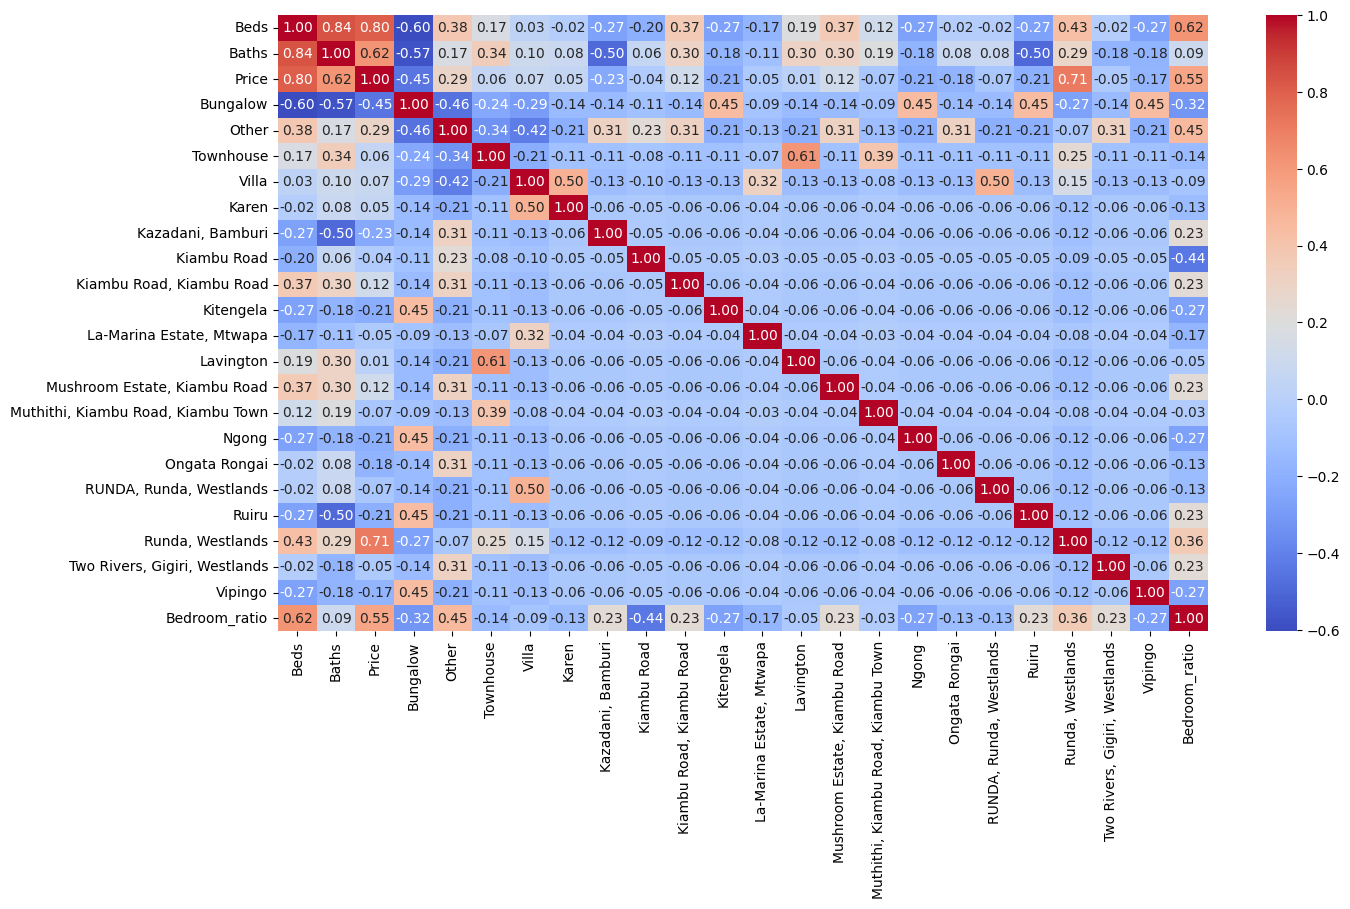

In [59]:
# Select only numeric columns for correlation calculation
numeric_data = processed_data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Split the data into training and testing datasets

In [60]:
from sklearn.model_selection import train_test_split

x = processed_data.drop(['Price'], axis=1) # x is the dataframe without the target variable; price
y = processed_data['Price'] # y is the dataframe with the column with the target variable

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [62]:
train_data = x_train.join(y_train) #combine the dataframes to fotm the training data

In [63]:
train_data

,Beds,Baths,Bungalow,Other,Townhouse,Villa,Karen,"Kazadani, Bamburi",Kiambu Road,"Kiambu Road, Kiambu Road",...,"Muthithi, Kiambu Road, Kiambu Town",Ngong,Ongata Rongai,"RUNDA, Runda, Westlands",Ruiru,"Runda, Westlands","Two Rivers, Gigiri, Westlands",Vipingo,Bedroom_ratio,Price
957,1.791759,1.945910,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.920782,60000000
2799,1.945910,1.945910,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.000000,85000000
1363,1.945910,1.945910,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.000000,85000000
925,1.609438,1.609438,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.000000,45000000
3834,1.386294,1.386294,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.000000,1999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,1.609438,1.609438,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.000000,45000000
1212,1.791759,1.945910,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.920782,60000000
2498,1.791759,1.791759,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1.000000,99000000
2652,1.386294,1.791759,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.773706,45000000


# Import and train ML model

**Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [65]:
test_data = x_test.join(y_test)

In [66]:
reg.score(x_test, y_test)

1.0

**Random Forest Model**

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV # Hyper-parameter Tuning Using a Parameter Grid: Grid Search with cross-validation

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, #five fold cross-valdation
                          scoring = "neg_mean_squared_error",
                          return_train_score = True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
"""
To get the optimal hyperparameters
"""
grid_search.best_estimator_ 

RandomForestRegressor(max_features=2, n_estimators=3)

In [69]:
best_forest = grid_search.best_estimator_
best_forest.score(x_test, y_test)

1.0

# Export the dataset to an SQL Db

In [70]:
# import sqlite3

# conn = sqlite3.connect('db.sqlite3')
# processed_data.to_sql('real_estate_house', conn, if_exists='replace', index=False, index_label='id')
# conn.close()